In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
forest = pd.read_csv('forestfires.csv')

In [8]:
forest.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = forest.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    forest[col] = label_encoder.fit_transform(forest[col])

numerical_cols = forest.select_dtypes(include=[np.number]).columns
categorical_cols = forest.select_dtypes(include=['object']).columns

print(f"\nNumerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")


Numerical columns: ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
Categorical columns: []


              X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.017303 -0.009129 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.062162  0.030100 -0.046308  0.007782 -0.101178   
month -0.017303 -0.062162  1.000000 -0.150982 -0.007636 -0.173152  0.219439   
day   -0.009129  0.030100 -0.150982  1.000000  0.074914  0.070218  0.058737   
FFMC  -0.021039 -0.046308 -0.007636  0.074914  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782 -0.173152  0.070218  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.219439  0.058737  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488 -0.172087  0.117738  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103 -0.073802  0.148672  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.102057 -0.103389 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.141131 -0.034504 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.033234 -0.076800  0.052881  0.056

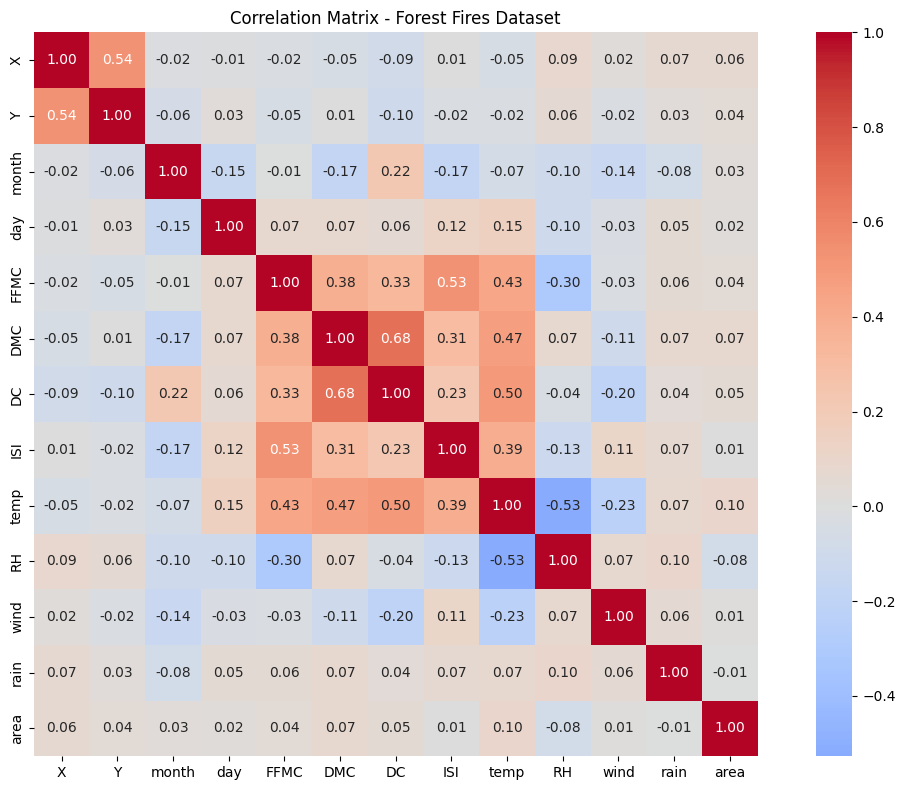

In [16]:
corr = forest.corr()
print(corr)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Correlation Matrix - Forest Fires Dataset')
plt.tight_layout()
plt.show()

In [17]:
forest.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [19]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StanderScaler
forest[["DMC", "DC"]] = MinMaxScaler().fit_transform(forest[["DMC", "DC"]])

In [21]:
forest.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,0.378264,0.633329,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,0.220698,0.290918,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,0.000000,0.000000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,0.232598,0.504046,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,0.369400,0.769673,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,0.486906,0.827958,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,1.000000,1.000000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [22]:
forest.drop('DMC',axis=1, inplace=True)

              X         Y     month       day      FFMC        DC       ISI  \
X      1.000000  0.539548 -0.017303 -0.009129 -0.021039 -0.085916  0.006210   
Y      0.539548  1.000000 -0.062162  0.030100 -0.046308 -0.101178 -0.024488   
month -0.017303 -0.062162  1.000000 -0.150982 -0.007636  0.219439 -0.172087   
day   -0.009129  0.030100 -0.150982  1.000000  0.074914  0.058737  0.117738   
FFMC  -0.021039 -0.046308 -0.007636  0.074914  1.000000  0.330512  0.531805   
DC    -0.085916 -0.101178  0.219439  0.058737  0.330512  1.000000  0.229154   
ISI    0.006210 -0.024488 -0.172087  0.117738  0.531805  0.229154  1.000000   
temp  -0.051258 -0.024103 -0.073802  0.148672  0.431532  0.496208  0.394287   
RH     0.085223  0.062221 -0.102057 -0.103389 -0.300995 -0.039192 -0.132517   
wind   0.018798 -0.020341 -0.141131 -0.034504 -0.028485 -0.203466  0.106826   
rain   0.065387  0.033234 -0.076800  0.052881  0.056702  0.035861  0.067668   
area   0.063385  0.044873  0.031054  0.018916  0.040

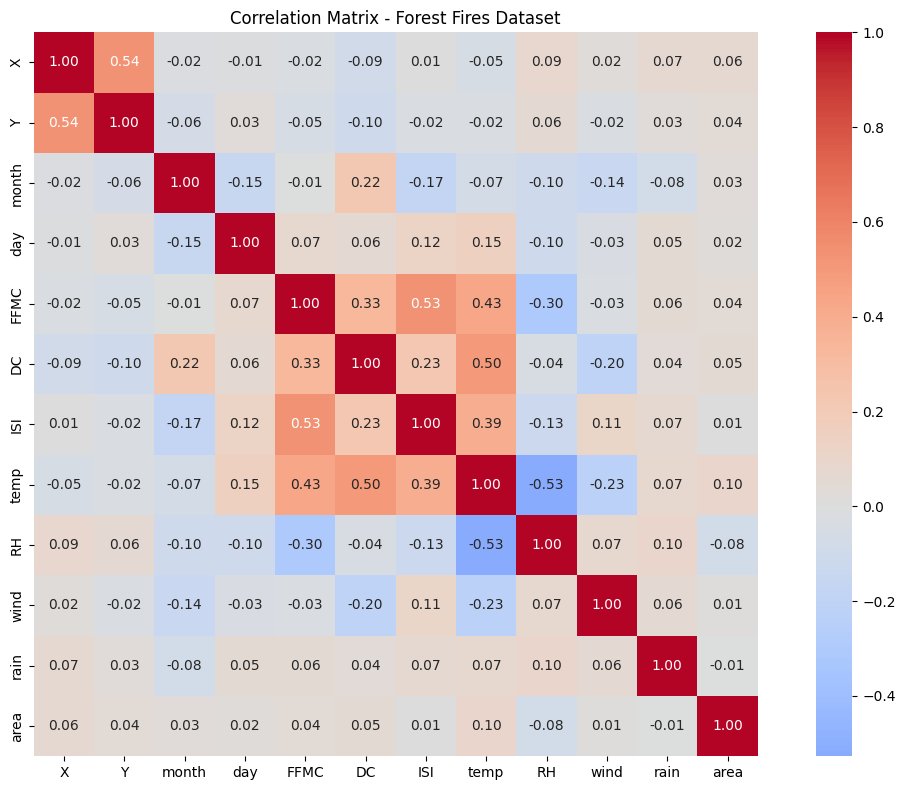

In [23]:
corr=forest.corr()
print(corr)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Correlation Matrix - Forest Fires Dataset')
plt.tight_layout()
plt.show()

In [24]:
forest.to_csv('df.csv', index=False)